In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pickle

In [ ]:
df = pd.read_excel('Judgment_Embeddings_InLegalBERT.xlsx')
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

Dataset Shape: (3229, 769)
Columns: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_759', 'feature_760', 'feature_761', 'feature_762',
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'Label'],
      dtype='object', length=769)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [ ]:
print("Missing Values:\n", df.isnull().sum().sum())
if df.isnull().sum().sum() > 0:
    df = df.dropna()

Missing Values:
 0


In [ ]:
X = df.drop(columns=["Label"])
y = df["Label"]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced dimensions: {X_pca.shape[1]}")

Reduced dimensions: 288


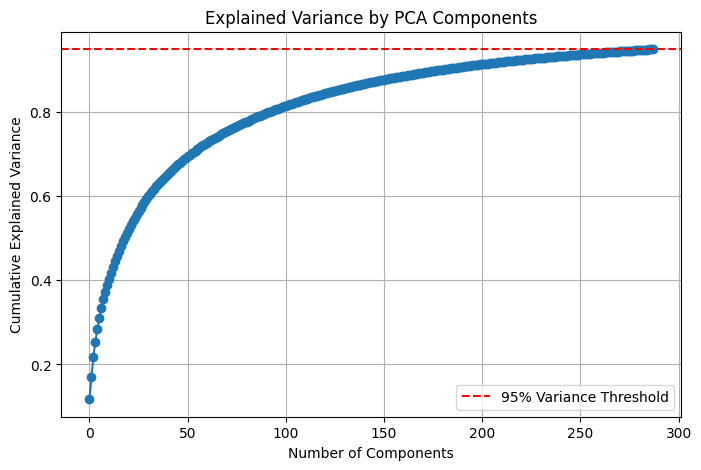

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# After fitting PCA
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y) # Changed df_pca to X_pca

# Optional: check new class distribution
from collections import Counter
print(Counter(y_resampled))

Counter({0: 1366, 1: 1366, 2: 1366, 3: 1366, 6: 1366, 5: 1366, 4: 1366, 13: 1366, 8: 1366, 9: 1366, 7: 1366, 10: 1366, 12: 1366, 11: 1366})


<ipython-input-15-ad37300d2599>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(original_dist.keys()), y=list(original_dist.values()), ax=axes[0], palette="pastel")
<ipython-input-15-ad37300d2599>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resampled_dist.keys()), y=list(resampled_dist.values()), ax=axes[1], palette="deep")


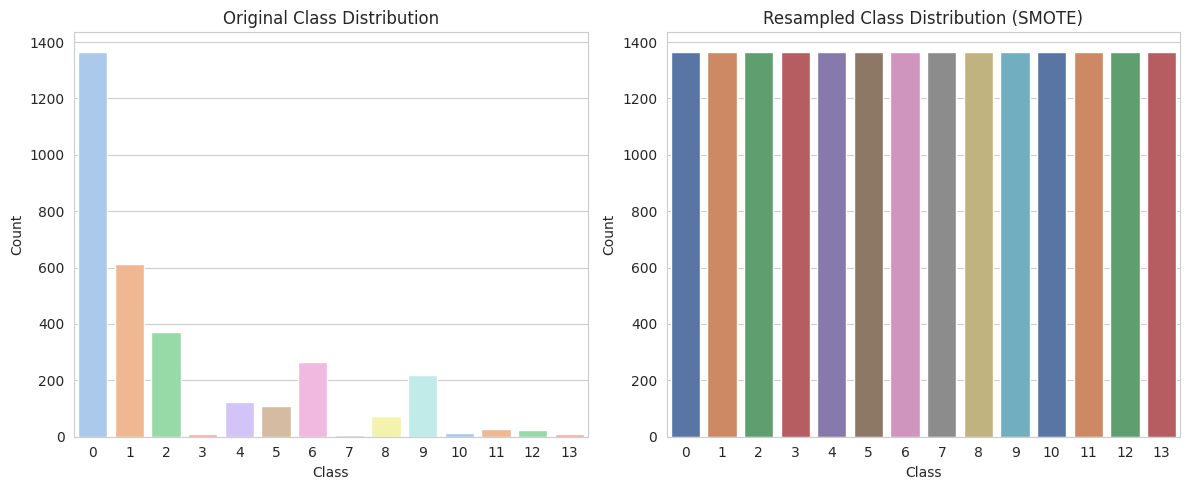

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Original class distribution
original_dist = Counter(y)
resampled_dist = Counter(y_resampled)

# Prepare data for plotting
dist_df = {
    "Original": original_dist,
    "Resampled (SMOTE)": resampled_dist
}

# Create a bar plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Plot original distribution
sns.barplot(x=list(original_dist.keys()), y=list(original_dist.values()), ax=axes[0], palette="pastel")
axes[0].set_title("Original Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Plot resampled distribution
sns.barplot(x=list(resampled_dist.keys()), y=list(resampled_dist.values()), ax=axes[1], palette="deep")
axes[1].set_title("Resampled Class Distribution (SMOTE)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top K features based on ANOVA F-value
k = 768  # You can choose any value based on your needs
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature indices or names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected features:", list(selected_features))

Selected features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_7

XG Boost and Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

#  Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ------------------- 1. Logistic Regression -------------------
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print(" Logistic Regression:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_lr))


# ------------------- 2. XGBoost Classifier -------------------
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("\n XGBoost:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

 Logistic Regression:
Training Accuracy: 0.9464670893522452
Testing Accuracy: 0.934640522875817
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.77      0.55      0.64       273
           1       0.92      0.81      0.86       273
           2       0.89      0.93      0.91       273
           3       0.99      1.00      0.99       274
           4       0.91      0.97      0.94       273
           5       0.89      0.97      0.93       273
           6       0.98      0.99      0.98       274
           7       1.00      1.00      1.00       273
           8       0.92      0.99      0.95       273
           9       0.83      0.88      0.86       273
          10       0.99      1.00      1.00       274
          11       0.99      1.00      0.99       273
          12       0.97      1.00      0.99       273
          13       1.00      1.00      1.00       273

    accuracy                           0.93      3825
   macr

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)  # Reduce to 100 components
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: 0.8127026101333245


Random Forest

Training Accuracy: 0.9980642663569493
 Random Forest Results:
Testing Accuracy: 0.6842105263157895
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.59      0.96      0.73       273
           1       0.88      0.69      0.77       123
           2       0.89      0.68      0.77        74
           3       0.00      0.00      0.00         2
           4       0.75      0.12      0.21        24
           5       0.00      0.00      0.00        22
           6       0.95      0.77      0.85        53
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.68       646
   m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


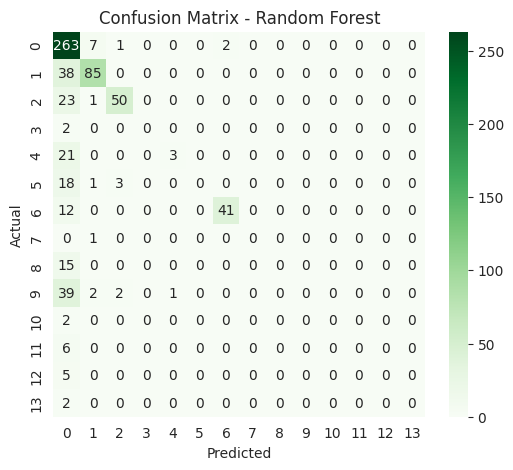

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Training accuracy using rf_model
y_train_pred_rf = rf_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))

#  Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print(" Random Forest Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_rf))

#  Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM

Training Accuracy: 0.8828027975684686
 SVM Results:
Testing Accuracy: 0.8739869281045751
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.57      0.44      0.49       273
           1       0.81      0.81      0.81       273
           2       0.79      0.78      0.78       273
           3       1.00      1.00      1.00       274
           4       0.85      0.87      0.86       273
           5       0.79      0.72      0.75       273
           6       0.94      0.97      0.96       274
           7       1.00      1.00      1.00       273
           8       0.84      0.93      0.88       273
           9       0.71      0.72      0.71       273
          10       0.99      1.00      0.99       274
          11       0.96      1.00      0.98       273
          12       0.92      0.99      0.95       273
          13       0.99      1.00      1.00       273

    accuracy                           0.87      3825
   macro avg  

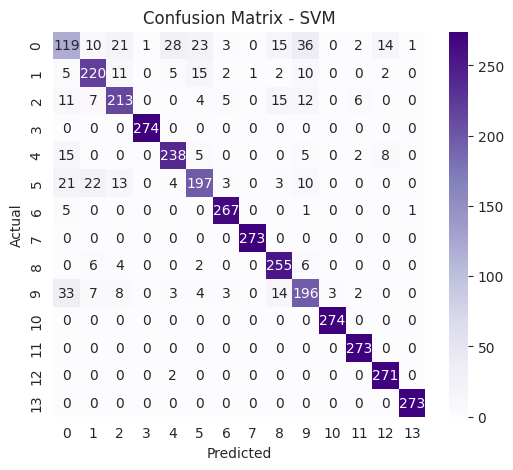

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Train an SVM classifier
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

#Training accuracy using svm_model
y_train_pred_svm = svm_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))

#Predict on test set
y_pred_svm = svm_model.predict(X_test)

#Evaluation
print(" SVM Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_svm))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree

Training Accuracy: 0.9997385450029413
🔹 Decision Tree Results:
Testing Accuracy: 0.8661437908496732
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.39       273
           1       0.71      0.71      0.71       273
           2       0.77      0.83      0.80       273
           3       1.00      1.00      1.00       274
           4       0.84      0.90      0.87       273
           5       0.78      0.85      0.81       273
           6       0.91      0.92      0.91       274
           7       1.00      1.00      1.00       273
           8       0.90      0.91      0.91       273
           9       0.72      0.77      0.75       273
          10       0.97      0.99      0.98       274
          11       0.97      0.96      0.97       273
          12       0.96      0.96      0.96       273
          13       0.99      1.00      0.99       273

    accuracy                           0.87      3825
   macro a

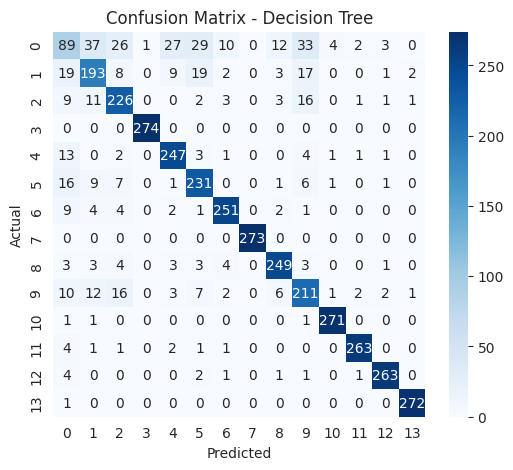

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

#Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Training accuracy using dt_model
y_train_pred_dt = dt_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))

#Predict on the test set
y_pred_dt = dt_model.predict(X_test)

#Evaluate the model
print("Decision Tree Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

#Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


Training Accuracy: 0.9360742532191646
k-NN Results:
Testing Accuracy: 0.9226143790849674
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.10      0.17       273
           1       0.93      0.85      0.89       273
           2       0.94      0.97      0.95       273
           3       0.97      1.00      0.99       274
           4       0.84      1.00      0.91       273
           5       0.82      1.00      0.90       273
           6       0.97      1.00      0.99       274
           7       1.00      1.00      1.00       273
           8       0.91      1.00      0.95       273
           9       0.83      1.00      0.91       273
          10       0.95      1.00      0.98       274
          11       0.99      1.00      1.00       273
          12       0.91      1.00      0.95       273
          13       1.00      1.00      1.00       273

    accuracy                           0.92      3825
   macro avg       0.

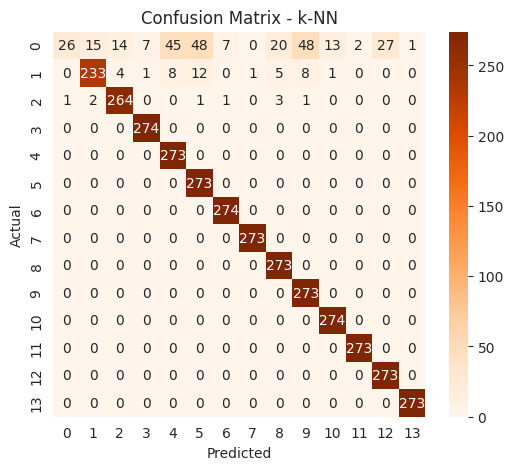

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Initialize k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

#Step 2: Train the model
knn_model.fit(X_train, y_train)

#Training accuracy using knn_model
y_train_pred_knn = knn_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_knn))

#Step 3: Predict on test set
y_pred_knn = knn_model.predict(X_test)

#Step 4: Evaluation
print("k-NN Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

#Step 5: Confusion Matrix (optional)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training Accuracy: 0.7895287273678018
AdaBoost Results:
Testing Accuracy: 0.7487581699346405
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.64      0.37       273
           1       0.67      0.70      0.68       273
           2       0.73      0.58      0.65       273
           3       1.00      0.97      0.98       274
           4       0.72      0.66      0.69       273
           5       0.81      0.51      0.63       273
           6       0.86      0.92      0.89       274
           7       1.00      0.93      0.97       273
           8       0.93      0.73      0.82       273
           9       0.55      0.59      0.57       273
          10       1.00      0.92      0.96       274
          11       1.00      0.88      0.94       273
          12       0.98      0.57      0.72       273
          13       1.00      0.87      0.93       273

    accuracy                           0.75      3825
   macro avg     

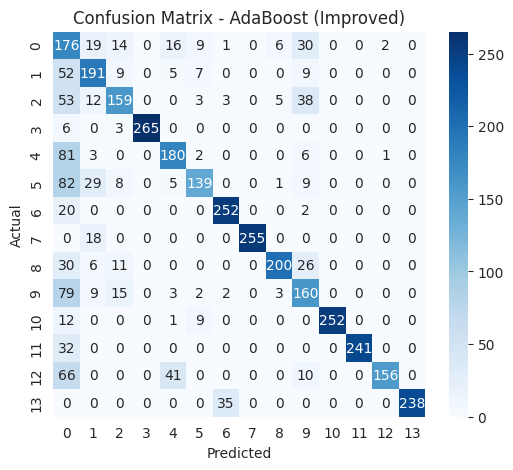

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize Improved AdaBoost
base_model = DecisionTreeClassifier(max_depth=3)  # Increased depth
adaboost_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=200,         # More boosting rounds
    learning_rate=0.5,        # Reduced learning rate
    random_state=42
)

# Step 2: Train the model
adaboost_model.fit(X_train, y_train)

#  Training accuracy
y_train_pred_ada = adaboost_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_ada))

# Step 3: Predict on test set
y_pred_ada = adaboost_model.predict(X_test)

# Step 4: Evaluation
print("AdaBoost Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Step 5: Confusion Matrix (optional)
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost (Improved)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training Accuracy: 0.9401921694228381
 CatBoost Results:
Testing Accuracy: 0.9134640522875817
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.52      0.61       273
           1       0.85      0.81      0.83       273
           2       0.80      0.89      0.84       273
           3       1.00      1.00      1.00       274
           4       0.89      0.95      0.92       273
           5       0.87      0.86      0.87       273
           6       0.95      0.98      0.96       274
           7       1.00      1.00      1.00       273
           8       0.91      0.97      0.94       273
           9       0.78      0.81      0.80       273
          10       1.00      1.00      1.00       274
          11       0.96      1.00      0.98       273
          12       0.99      1.00      1.00       273
          13       1.00      1.00      1.00       273

    accuracy                           0.91      3825
   macro avg    

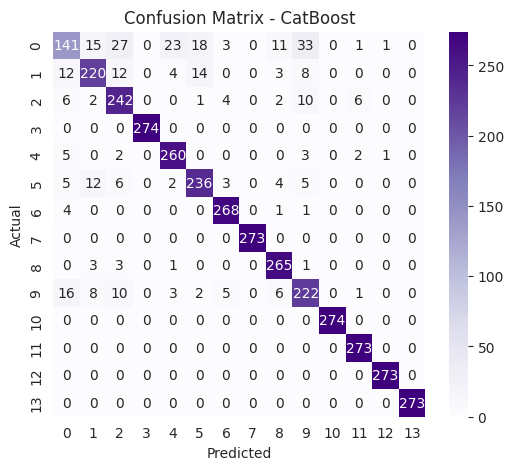

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize CatBoost (silent mode to suppress output)
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Step 2: Train the model
cat_model.fit(X_train, y_train)

# Correct training accuracy using cat_model
y_train_pred_cat = cat_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_cat))

# Step 3: Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Step 4: Evaluation
print(" CatBoost Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))

# Step 5: Confusion Matrix (optional)
cm = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NAVIE BAYES


 Naive Bayes Results:
Training Accuracy: 0.741355644159749
Testing Accuracy: 0.7362091503267973
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.38      0.43       273
           1       0.75      0.57      0.65       273
           2       0.48      0.65      0.55       273
           3       1.00      0.96      0.98       274
           4       0.57      0.67      0.61       273
           5       0.41      0.40      0.40       273
           6       0.95      0.90      0.93       274
           7       0.99      0.98      0.99       273
           8       0.74      0.85      0.79       273
           9       0.45      0.62      0.52       273
          10       0.92      0.81      0.86       274
          11       0.94      0.95      0.94       273
          12       0.91      0.67      0.77       273
          13       1.00      0.90      0.95       273

    accuracy                           0.74      3825
   macro avg  

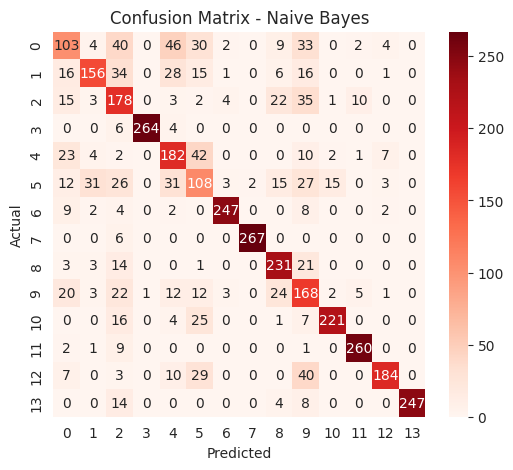

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 2: Train the model
nb_model.fit(X_train, y_train)

# Step 3: Predict on both training and test sets
y_train_pred_nb = nb_model.predict(X_train)
y_pred_nb = nb_model.predict(X_test)

# Step 4: Evaluation
print(" Naive Bayes Results:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


MLP

Training Accuracy: 0.997320086280149
 MLP Classifier Results:
Testing Accuracy: 0.9670588235294117
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       273
           1       0.89      0.91      0.90       273
           2       0.97      0.99      0.98       273
           3       1.00      1.00      1.00       274
           4       0.93      0.98      0.95       273
           5       0.97      1.00      0.99       273
           6       0.98      0.99      0.99       274
           7       1.00      1.00      1.00       273
           8       0.98      0.99      0.98       273
           9       0.93      1.00      0.96       273
          10       1.00      1.00      1.00       274
          11       1.00      1.00      1.00       273
          12       1.00      1.00      1.00       273
          13       1.00      1.00      1.00       273

    accuracy                           0.97      3825
   m

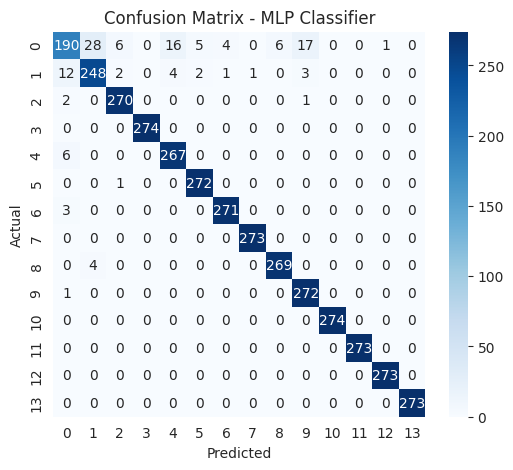

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Scale features (important for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

#Training accuracy using mlp_model
y_train_pred_mlp = mlp_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_mlp))

#Predict on test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

#Evaluation
print(" MLP Classifier Results:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_mlp))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate  # Install with: pip install tabulate

all_model_preds = {
    "Random Forest": (y_train_pred_rf, y_pred_rf),
    "SVM": (y_train_pred_svm, y_pred_svm),
    "Decision Tree": (y_train_pred_dt, y_pred_dt),
    "k-NN": (y_train_pred_knn, y_pred_knn),
    "AdaBoost (Improved)": (y_train_pred_ada, y_pred_ada),
    "CatBoost": (y_train_pred_cat, y_pred_cat),
    "Naive Bayes": (y_train_pred_nb, y_pred_nb),
    "Logistic Regression": (y_train_pred_lr, y_test_pred_lr),
    "XGBoost": (y_train_pred_xgb, y_test_pred_xgb),
    "MLP Classifier": (y_train_pred_mlp, y_pred_mlp)  # Added line
}


# Collect metrics for both training and testing
metrics_rows = []
for model_name, (train_pred, test_pred) in all_model_preds.items():
    row = [
        model_name,
        # Training Metrics
        round(accuracy_score(y_train, train_pred), 4),
        # Testing Metrics
        round(accuracy_score(y_test, test_pred), 4),
        round(precision_score(y_test, test_pred, average='weighted', zero_division=0), 4),
        round(recall_score(y_test, test_pred, average='weighted', zero_division=0), 4),
        round(f1_score(y_test, test_pred, average='weighted', zero_division=0), 4)
    ]
    metrics_rows.append(row)

#  Print table using tabulate
headers = [
    "Model",
    "Accuracy",      # Training
    " Accuracy", " Precision", " Recall", " F1 Score"       # Testing
]

print(" Final Model Comparison (Train & Test):\n")
print(tabulate(metrics_rows, headers=headers, tablefmt="github"))


 Final Model Comparison (Train & Test):

| Model               |   Accuracy |    Accuracy |    Precision |    Recall |    F1 Score |
|---------------------|------------|-------------|--------------|-----------|-------------|
| Random Forest       |     0.9997 |      0.9681 |       0.9674 |    0.9681 |      0.9669 |
| SVM                 |     0.8828 |      0.874  |       0.8678 |    0.874  |      0.8698 |
| Decision Tree       |     0.9997 |      0.8661 |       0.8588 |    0.8661 |      0.8608 |
| k-NN                |     0.9361 |      0.9226 |       0.9293 |    0.9226 |      0.8983 |
| AdaBoost (Improved) |     0.7895 |      0.7488 |       0.8215 |    0.7488 |      0.7704 |
| CatBoost            |     0.9402 |      0.9135 |       0.9106 |    0.9135 |      0.9102 |
| Naive Bayes         |     0.7414 |      0.7362 |       0.7563 |    0.7362 |      0.7406 |
| Logistic Regression |     0.9465 |      0.9346 |       0.932  |    0.9346 |      0.9315 |
| XGBoost             |     0.9997 |   

NEW SECTION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# STEP 1: Identify feature columns (make sure they match your actual data)
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]

# STEP 2: Extract features and ensure they are numeric, then drop rows with NaN values
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows where any feature in X is NaN, and also drop corresponding target values in y
X_clean = X.dropna()
y_clean = df.loc[X_clean.index, "Label"].values

# STEP 3: Check if there are enough features after cleaning
print(f"Number of features after cleaning: {X_clean.shape[1]}")

# STEP 4: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# STEP 5: Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # Use liblinear for smaller datasets
log_reg.fit(X_scaled, y_clean)

# STEP 6: Use SelectFromModel to select important features based on the coefficients
selector = SelectFromModel(log_reg, threshold="mean", max_features=20)
selector.fit(X_scaled, y_clean)

# STEP 7: Get the top 20 important features
top_20_features = X_clean.columns[selector.get_support()]

# Output top 20 features
print("Top 20 features based on Logistic Regression using SelectFromModel:")
print(top_20_features)

Number of features after cleaning: 768
Top 20 features based on Logistic Regression using SelectFromModel:
Index(['feature_21', 'feature_41', 'feature_112', 'feature_116', 'feature_179',
       'feature_281', 'feature_377', 'feature_414', 'feature_469',
       'feature_507', 'feature_517', 'feature_536', 'feature_554',
       'feature_609', 'feature_620', 'feature_647', 'feature_684',
       'feature_718', 'feature_728', 'feature_730'],
      dtype='object')


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Ensure the target (y) is aligned with X and drop any NaN values
y = df.loc[X.index, "Label"].values

# STEP 2: Convert labels to binary (0 and 1) explicitly
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure labels are binary (0 and 1)
if len(np.unique(y)) != 2:
    y = np.where(y != 0, 1, 0)

# STEP 3: Convert to DMatrix format (XGBoost input format)
dtrain = xgb.DMatrix(X, label=y)

# STEP 4: Train the model
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
model = xgb.train(params, dtrain, num_boost_round=100)

# STEP 5: Get feature importances
importance = model.get_score(importance_type='weight')

# STEP 6: Sort and get the top 20 features
top_20_features = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:20]

# Output top 20 features
print("Top 20 features:", [feature for feature, _ in top_20_features])


Top 20 features: ['feature_577', 'feature_421', 'feature_228', 'feature_519', 'feature_731', 'feature_4', 'feature_384', 'feature_662', 'feature_713', 'feature_21', 'feature_62', 'feature_656', 'feature_314', 'feature_526', 'feature_624', 'feature_695', 'feature_108', 'feature_164', 'feature_242', 'feature_407']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Ensure the target (y) is aligned with X and drop any NaN values
y = df.loc[X.index, "Label"].values

# STEP 2: Convert labels to binary (0 and 1) explicitly
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure labels are binary (0 and 1)
if len(np.unique(y)) != 2:
    y = np.where(y != 0, 1, 0)

# STEP 3: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# STEP 4: Get feature importances
importance = rf.feature_importances_

# STEP 5: Sort and get the top 20 features
top_20_indices = np.argsort(importance)[::-1][:20]
top_20_features = X.columns[top_20_indices]

# Output top 20 features
print("Top 20 features:", top_20_features)


Top 20 features: Index(['feature_228', 'feature_577', 'feature_578', 'feature_329',
       'feature_635', 'feature_703', 'feature_735', 'feature_731',
       'feature_18', 'feature_284', 'feature_72', 'feature_226', 'feature_669',
       'feature_495', 'feature_713', 'feature_620', 'feature_163',
       'feature_489', 'feature_624', 'feature_318'],
      dtype='object')


In [ ]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Ensure the target (y) is aligned with X and drop any NaN values
y = df.loc[X.index, "Label"].values

# STEP 2: Convert labels to binary (0 and 1) explicitly
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure labels are binary (0 and 1)
if len(np.unique(y)) != 2:
    y = np.where(y != 0, 1, 0)

# STEP 3: Train a Linear SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X, y)

# STEP 4: Get the feature importances (coefficients for linear SVM)
importance = np.abs(svm.coef_).flatten()

# STEP 5: Sort and get the top 20 features
top_20_indices = np.argsort(importance)[::-1][:20]
top_20_features = X.columns[top_20_indices]

# Output top 20 features
print("Top 20 features:", top_20_features)


Top 20 features: Index(['feature_656', 'feature_116', 'feature_120', 'feature_731',
       'feature_466', 'feature_713', 'feature_577', 'feature_3', 'feature_580',
       'feature_568', 'feature_755', 'feature_712', 'feature_535',
       'feature_100', 'feature_476', 'feature_620', 'feature_481',
       'feature_179', 'feature_735', 'feature_585'],
      dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Ensure the target (y) is aligned with X and drop any NaN values
y = df.loc[X.index, "Label"].values

# STEP 2: Convert labels to binary (0 and 1) explicitly
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure labels are binary (0 and 1)
if len(np.unique(y)) != 2:
    y = np.where(y != 0, 1, 0)

# STEP 3: Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X, y)

# STEP 4: Get the feature importances
importance = dtree.feature_importances_

# STEP 5: Sort and get the top 20 features
top_20_indices = np.argsort(importance)[::-1][:20]
top_20_features = X.columns[top_20_indices]

# Output top 20 features
print("Top 20 features:", top_20_features)


Top 20 features: Index(['feature_228', 'feature_226', 'feature_577', 'feature_617',
       'feature_489', 'feature_519', 'feature_570', 'feature_352',
       'feature_713', 'feature_329', 'feature_209', 'feature_748',
       'feature_712', 'feature_401', 'feature_699', 'feature_246',
       'feature_763', 'feature_632', 'feature_148', 'feature_46'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# STEP 4: Calculate permutation importance
result = permutation_importance(knn, X, y, n_repeats=5, random_state=42, n_jobs=-1)

# STEP 5: Extract and display top 20 features
importances = result.importances_mean
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via KNN):")
print(top_20_features)


Top 20 important features (via KNN):
['feature_597', 'feature_609', 'feature_435', 'feature_468', 'feature_71', 'feature_610', 'feature_563', 'feature_576', 'feature_286', 'feature_559', 'feature_167', 'feature_59', 'feature_292', 'feature_260', 'feature_277', 'feature_324', 'feature_6', 'feature_104', 'feature_650', 'feature_616']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Train AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# STEP 4: Get top 20 features
importances = model.feature_importances_
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via AdaBoost):")
print(top_20_features)

Top 20 important features (via AdaBoost):
['feature_642', 'feature_224', 'feature_417', 'feature_148', 'feature_50', 'feature_199', 'feature_354', 'feature_729', 'feature_625', 'feature_760', 'feature_497', 'feature_745', 'feature_514', 'feature_300', 'feature_181', 'feature_571', 'feature_710', 'feature_274', 'feature_757', 'feature_270']


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Train CatBoost model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, cat_features=[], random_state=42, verbose=0)
model.fit(X, y)

# STEP 4: Get top 20 features
importances = model.get_feature_importance()
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via CatBoost):")
print(top_20_features)


Top 20 important features (via CatBoost):
['feature_144', 'feature_41', 'feature_148', 'feature_18', 'feature_624', 'feature_553', 'feature_635', 'feature_712', 'feature_352', 'feature_296', 'feature_261', 'feature_210', 'feature_277', 'feature_253', 'feature_511', 'feature_497', 'feature_118', 'feature_62', 'feature_637', 'feature_163']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Compute mutual information as feature importance
importances = mutual_info_classif(X, y, discrete_features=False)
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via Naive Bayes - mutual info):")
print(top_20_features)


Top 20 important features (via Naive Bayes - mutual info):
['feature_224', 'feature_610', 'feature_148', 'feature_680', 'feature_553', 'feature_757', 'feature_729', 'feature_144', 'feature_290', 'feature_681', 'feature_321', 'feature_625', 'feature_386', 'feature_712', 'feature_193', 'feature_707', 'feature_5', 'feature_296', 'feature_86', 'feature_253']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Train the MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(X, y)

# STEP 4: Calculate permutation importance
result = permutation_importance(model, X, y, n_repeats=10, random_state=42, scoring='accuracy')

# STEP 5: Get top 20 features
importances = result.importances_mean
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via MLP - permutation importance):")
print(top_20_features)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Top 20 important features (via MLP - permutation importance):
['feature_469', 'feature_234', 'feature_54', 'feature_7', 'feature_609', 'feature_618', 'feature_248', 'feature_116', 'feature_167', 'feature_712', 'feature_535', 'feature_371', 'feature_3', 'feature_571', 'feature_165', 'feature_446', 'feature_41', 'feature_351', 'feature_460', 'feature_74']


logistic regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# STEP 1: Identify feature columns
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]

# STEP 2: Extract features and clean
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce')
X_clean = X.dropna()
y_clean = df.loc[X_clean.index, "Label"].values

# STEP 3: Scale full feature set
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X_clean)

# STEP 4: Select top 20 features using base Logistic Regression for feature selection
base_model = LogisticRegression(max_iter=1000, solver='liblinear')
selector = SelectFromModel(base_model, threshold="mean", max_features=20)
selector.fit(X_scaled_all, y_clean)

# Get selected features and reduce the dataset
selected_feature_indices = selector.get_support()
top_20_features = X_clean.columns[selected_feature_indices]
X_selected = X_clean[top_20_features]

print("Top 20 features selected by Logistic Regression:")
print(top_20_features)

# --------------- Handle Class Imbalance with SMOTE ---------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_clean)

# --------------- Train-Test Split ---------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ------------------- 1. Logistic Regression with Hyperparameter Tuning -------------------
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best model and evaluation
best_lr_model = grid_search_lr.best_estimator_
y_train_pred_lr = best_lr_model.predict(X_train)
y_test_pred_lr = best_lr_model.predict(X_test)

print("\nLogistic Regression:")
print("Best hyperparameters:", grid_search_lr.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_lr))

# ------------------- 2. XGBoost with Hyperparameter Tuning -------------------
# Train XGBoost model to get feature importance
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances from XGBoost
feature_importances = xgb_model.feature_importances_

# Select top 20 features based on importance
top_20_feature_indices_xgb = np.argsort(feature_importances)[::-1][:20]
top_20_features_xgb = X_selected.columns[top_20_feature_indices_xgb]

print("\nTop 20 features selected by XGBoost:")
print(top_20_features_xgb)

# Reduce X_train and X_test to top 20 features for XGBoost
X_train_selected_xgb = X_train[top_20_features_xgb]
X_test_selected_xgb = X_test[top_20_features_xgb]

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_selected_xgb, y_train)

# Best model and evaluation
best_xgb_model = grid_search_xgb.best_estimator_
y_train_pred_xgb = best_xgb_model.predict(X_train_selected_xgb)
y_test_pred_xgb = best_xgb_model.predict(X_test_selected_xgb)

print("\nXGBoost:")
print("Best hyperparameters:", grid_search_xgb.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

Top 20 features selected by Logistic Regression:
Index(['feature_21', 'feature_41', 'feature_112', 'feature_116', 'feature_179',
       'feature_281', 'feature_377', 'feature_414', 'feature_469',
       'feature_507', 'feature_517', 'feature_536', 'feature_554',
       'feature_609', 'feature_620', 'feature_647', 'feature_684',
       'feature_718', 'feature_728', 'feature_730'],
      dtype='object')

Logistic Regression:
Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.6388652853127655
Testing Accuracy: 0.6483660130718955
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.25      0.10      0.14       273
           1       0.58      0.45      0.51       273
           2       0.54      0.57      0.55       273
           3       0.83      0.95      0.89       274
           4       0.55      0.53      0.54       273
           5       0.44      0.30      0.36       273
           6   

Randomforest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare features
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()

# STEP 2: Prepare labels
y = df.loc[X.index, "Label"].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # No binary conversion

# STEP 3: Initial Random Forest to get top 20 features based on feature importances
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)
importance = rf_temp.feature_importances_
top_20_indices = np.argsort(importance)[::-1][:20]
top_20_features = X.columns[top_20_indices]
X_selected = X[top_20_features]

print("Top 20 features selected by Random Forest:")
print(top_20_features)

# STEP 4: SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# STEP 5: Train/Test split (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# STEP 7: Evaluation
best_rf = grid_search_rf.best_estimator_

# Predicting on the train and test set
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Output the results
print("\nBest Random Forest Hyperparameters:", grid_search_rf.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))

Top 20 features selected by Random Forest:
Index(['feature_224', 'feature_148', 'feature_757', 'feature_712',
       'feature_610', 'feature_144', 'feature_368', 'feature_228',
       'feature_497', 'feature_553', 'feature_578', 'feature_284',
       'feature_95', 'feature_735', 'feature_18', 'feature_625', 'feature_189',
       'feature_729', 'feature_703', 'feature_577'],
      dtype='object')

Best Random Forest Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 0.9997385450029413
Testing Accuracy: 0.9615686274509804
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       273
           1       0.90      0.91      0.91       273
           2       0.92      0.95      0.94       273
           3       1.00      1.00      1.00       274
           4       0.95      0.99      0.97       273
           5       0.99  

SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Use LinearSVC to get top 20 features for multi-class
svm_linear = LinearSVC(random_state=42, dual=False, max_iter=5000)
svm_linear.fit(X, y)

# Use mean absolute coefficient across classes to rank features
importance = np.mean(np.abs(svm_linear.coef_), axis=0)
top_20_indices = np.argsort(importance)[::-1][:20]
top_20_features = X.columns[top_20_indices]
X_selected = X[top_20_features]

print("Top 20 features selected using SVM:")
print(top_20_features)

# STEP 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Grid Search for Best SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# STEP 8: Evaluation
best_svm = grid_search.best_estimator_
y_pred_train = best_svm.predict(X_train_scaled)
y_pred_test = best_svm.predict(X_test_scaled)

print("\nBest SVM Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report (Test):\n", classification_report(
    y_test, y_pred_test, target_names=label_encoder.classes_.astype(str)))

Top 20 features selected using SVM:
Index(['feature_718', 'feature_499', 'feature_580', 'feature_377',
       'feature_353', 'feature_554', 'feature_647', 'feature_116',
       'feature_179', 'feature_32', 'feature_225', 'feature_767',
       'feature_248', 'feature_414', 'feature_748', 'feature_620',
       'feature_469', 'feature_251', 'feature_229', 'feature_460'],
      dtype='object')

Best SVM Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.997908360023531
Testing Accuracy: 0.9631372549019608
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.65      0.74       273
           1       0.86      0.89      0.88       273
           2       0.94      0.97      0.95       273
           3       1.00      1.00      1.00       274
           4       0.97      1.00      0.99       273
           5       0.97      1.00      0.99       273
           6       0.97      0.99      0.98       2

Decision Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Optional: If there are multiple classes, we don't need to convert them to binary
# If you want to convert multi-class to binary, uncomment the following:
# if len(np.unique(y)) != 2:
#     y = np.where(y != 0, 1, 0)

# STEP 3: Train a base Decision Tree to get top 20 features
dtree_base = DecisionTreeClassifier(random_state=42)
dtree_base.fit(X, y)
importance = dtree_base.feature_importances_
top_20_indices = np.argsort(importance)[::-1][:20]
top_20_features = X.columns[top_20_indices]
X_selected = X[top_20_features]

print("Top 20 features selected using Decision Tree:")
print(top_20_features)

# STEP 4: Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# STEP 5: Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Optional Scaling (not strictly needed for Decision Trees but for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# STEP 8: Evaluation
best_tree = grid_search.best_estimator_
y_train_pred = best_tree.predict(X_train_scaled)
y_test_pred = best_tree.predict(X_test_scaled)

print("\nBest Decision Tree Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

Top 20 features selected using Decision Tree:
Index(['feature_224', 'feature_610', 'feature_228', 'feature_507',
       'feature_144', 'feature_385', 'feature_270', 'feature_41',
       'feature_226', 'feature_561', 'feature_47', 'feature_368',
       'feature_256', 'feature_677', 'feature_181', 'feature_296',
       'feature_560', 'feature_617', 'feature_142', 'feature_407'],
      dtype='object')

Best Decision Tree Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Training Accuracy: 0.9997385450029413
Testing Accuracy: 0.8405228758169935
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       273
           1       0.71      0.68      0.70       273
           2       0.74      0.82      0.77       273
           3       0.98      0.98      0.98       274
           4       0.80      0.86      0.83       273
           5       0.77      0.78      0.77       273
           

KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)
top_20_features = X.columns[selector.get_support()]

print("Top 20 features selected using SelectKBest:")
print(top_20_features)

# STEP 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# STEP 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# STEP 8: Evaluation
best_knn = grid_search.best_estimator_
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

print("\nBest KNN Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))


Top 20 features selected using SelectKBest:
Index(['feature_5', 'feature_144', 'feature_148', 'feature_224', 'feature_312',
       'feature_321', 'feature_368', 'feature_380', 'feature_386',
       'feature_518', 'feature_553', 'feature_610', 'feature_625',
       'feature_637', 'feature_680', 'feature_681', 'feature_707',
       'feature_712', 'feature_729', 'feature_757'],
      dtype='object')

Best KNN Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Training Accuracy: 0.9997385450029413
Testing Accuracy: 0.9351633986928105
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.23      0.37       273
           1       0.89      0.89      0.89       273
           2       0.92      1.00      0.95       273
           3       0.98      1.00      0.99       274
           4       0.89      1.00      0.94       273
           5       0.91      1.00      0.95       273
           6       0.96

adaBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)
top_20_features = X.columns[selector.get_support()]
print("Top 20 features selected using SelectKBest:")
print(top_20_features)

# STEP 4: Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# STEP 5: Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Feature Scaling (Optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Set up AdaBoost with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# STEP 8: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(
    AdaBoostClassifier(estimator=base_estimator, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# STEP 9: Evaluation
best_adaboost = grid_search.best_estimator_
y_train_pred = best_adaboost.predict(X_train_scaled)
y_test_pred = best_adaboost.predict(X_test_scaled)

print("\nBest AdaBoost Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

Top 20 features selected using SelectKBest:
Index(['feature_5', 'feature_144', 'feature_148', 'feature_224', 'feature_312',
       'feature_321', 'feature_368', 'feature_380', 'feature_386',
       'feature_518', 'feature_553', 'feature_610', 'feature_625',
       'feature_637', 'feature_680', 'feature_681', 'feature_707',
       'feature_712', 'feature_729', 'feature_757'],
      dtype='object')

Best AdaBoost Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}
Training Accuracy: 0.31407281521668085
Testing Accuracy: 0.3168627450980392
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.15      0.13      0.14       273
           1       0.29      0.43      0.35       273
           2       0.22      0.32      0.26       273
           3       0.39      0.30      0.34       274
           4       0.31      0.46      0.37       273
           5       0.16      0.15      0.15       273
           6      

catBoost

In [62]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Extract feature columns
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Feature Selection (Top 20)
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)
top_20_features = X.columns[selector.get_support()]
print("Top 20 Selected Features:\n", list(top_20_features))

# STEP 4: SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Fast hyperparameter tuning for CatBoost
param_grid = {
    'depth': [4, 6],
    'iterations': [50, 100],
    'learning_rate': [0.1, 0.3]
}

grid = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

# STEP 8: Final evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\nBest CatBoost Hyperparameters:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=[str(cls) for cls in label_encoder.classes_]))

Top 20 Selected Features:
 ['feature_5', 'feature_144', 'feature_148', 'feature_224', 'feature_312', 'feature_321', 'feature_368', 'feature_380', 'feature_386', 'feature_518', 'feature_553', 'feature_610', 'feature_625', 'feature_637', 'feature_680', 'feature_681', 'feature_707', 'feature_712', 'feature_729', 'feature_757']

Best CatBoost Hyperparameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.3}
Test Accuracy: 0.9003921568627451
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.45      0.55       273
           1       0.84      0.75      0.79       273
           2       0.82      0.88      0.85       273
           3       0.99      1.00      0.99       274
           4       0.87      0.92      0.89       273
           5       0.90      0.88      0.89       273
           6       0.95      0.96      0.95       274
           7       1.00      1.00      1.00       273
           8       0.90      0.98      0.94

Navie Bayes

In [63]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# STEP 4: Compute mutual information for feature selection
importances = mutual_info_classif(X_resampled, y_resampled, discrete_features=False)
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via Naive Bayes - mutual info):")
for feat, score in zip(top_20_features, importances[top_20_indices]):
    print(f"{feat}: {score:.4f}")

# STEP 5: Use only the top 20 features for further steps
X_selected = X_resampled.iloc[:, top_20_indices]

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 7: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 8: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# STEP 9: Get Best Naive Bayes Model and Evaluation
best_model = grid_search.best_estimator_

# Predict
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Output
print("\nBest Naive Bayes Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Fix: convert class names to strings
target_names = [str(cls) for cls in label_encoder.inverse_transform(np.unique(y_test))]
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred, target_names=target_names))

Top 20 important features (via Naive Bayes - mutual info):
feature_253: 0.5479
feature_296: 0.5346
feature_193: 0.5305
feature_461: 0.5144
feature_703: 0.5035
feature_290: 0.5035
feature_597: 0.4921
feature_351: 0.4851
feature_707: 0.4839
feature_95: 0.4803
feature_224: 0.4736
feature_31: 0.4731
feature_757: 0.4713
feature_300: 0.4701
feature_720: 0.4658
feature_148: 0.4648
feature_554: 0.4638
feature_19: 0.4602
feature_274: 0.4558
feature_616: 0.4530

Best Naive Bayes Hyperparameters: {'var_smoothing': 1e-09}
Training Accuracy: 0.5744819922870776
Testing Accuracy: 0.5636601307189543
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.37      0.07      0.11       273
           1       0.57      0.35      0.44       273
           2       0.33      0.68      0.44       273
           3       0.69      0.51      0.59       274
           4       0.49      0.21      0.29       273
           5       0.20      0.06      0.09       273

MLP

In [66]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Prepare the data
embedding_cols = [col for col in df.columns if col.startswith("embedding_") or col.startswith("feature_")]
X = df[embedding_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = df.loc[X.index, "Label"].values

# STEP 2: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# STEP 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# STEP 4: Feature Scaling (entire dataset before train/test split)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# STEP 6: Randomized Hyperparameter Search
param_dist = {
    'hidden_layer_sizes': [(100,), (150,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

search = RandomizedSearchCV(
    MLPClassifier(max_iter=300, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1, random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Only 10 random combos
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# STEP 7: Evaluation
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("\nBest MLP Hyperparameters:", search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
target_names = [str(cls) for cls in label_encoder.classes_]
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred, target_names=target_names))


# STEP 8: Permutation Importance (on full scaled data)
perm_result = permutation_importance(best_model, X_scaled, y_resampled, n_repeats=5, random_state=42, scoring='accuracy')
importances = perm_result.importances_mean
top_20_indices = np.argsort(importances)[-20:][::-1]
top_20_features = [X.columns[i] for i in top_20_indices]

print("Top 20 important features (via MLP - permutation importance):")
for feat in top_20_features:
    print(feat)


Best MLP Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (200,), 'alpha': 0.01, 'activation': 'relu'}
Training Accuracy: 0.9958167200470619
Testing Accuracy: 0.9725490196078431
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       273
           1       0.94      0.92      0.93       273
           2       0.95      1.00      0.97       273
           3       1.00      1.00      1.00       274
           4       0.95      0.99      0.97       273
           5       0.99      1.00      0.99       273
           6       0.99      0.99      0.99       274
           7       1.00      1.00      1.00       273
           8       0.97      1.00      0.99       273
           9       0.93      0.99      0.96       273
          10       1.00      1.00      1.00       274
          11       1.00      1.00      1.00       273
          12       0.99      1.00      0.99       273
          13       1.00 

KeyboardInterrupt: 

In [6]:
import pandas as pd
from tabulate import tabulate  # Make sure to install with: pip install tabulate

# Manually input the accuracy for each model
accuracy_results = {
    "Model": [
        "Random Forest",
        "SVM",
        "Decision Tree",
        "k-NN",
        "AdaBoost (Improved)",
        "CatBoost",
        "Naive Bayes",
        "Logistic Regression",
        "XGBoost",
        "MLP Classifier"
    ],
    "Train Accuracy": [
        0.99,  # Random Forest
        0.99,  # SVM
        0.99,  # Decision Tree
        0.99,  # k-NN
        0.33,  # AdaBoost (Improved)
        0.96,  # CatBoost
        0.57,  # Naive Bayes
        0.63,  # Logistic Regression
        0.99,  # XGBoost
        0.99   # MLP Classifier
    ],
    "Test Accuracy": [
        0.96,  # Random Forest
        0.96,  # SVM
        0.84,  # Decision Tree
        0.93,  # k-NN
        0.32,  # AdaBoost (Improved)
        0.90,  # CatBoost
        0.56,  # Naive Bayes
        0.64,  # Logistic Regression
        0.94,  # XGBoost
        0.97   # MLP Classifier
    ]
}

# Create a DataFrame from the accuracy results
df_accuracy = pd.DataFrame(accuracy_results)

# Print the table using tabulate
print("📊 Final Model Accuracy Comparison (Train & Test):\n")
print(tabulate(df_accuracy, headers='keys', tablefmt='github', showindex=False))


📊 Final Model Accuracy Comparison (Train & Test):

| Model               |   Train Accuracy |   Test Accuracy |
|---------------------|------------------|-----------------|
| Random Forest       |             0.99 |            0.96 |
| SVM                 |             0.99 |            0.96 |
| Decision Tree       |             0.99 |            0.84 |
| k-NN                |             0.99 |            0.93 |
| AdaBoost (Improved) |             0.33 |            0.32 |
| CatBoost            |             0.96 |            0.9  |
| Naive Bayes         |             0.57 |            0.56 |
| Logistic Regression |             0.63 |            0.64 |
| XGBoost             |             0.99 |            0.94 |
| MLP Classifier      |             0.99 |            0.97 |
